Arrest Made to Crime Occurrence by Year

In [2]:
%matplotlib inline

In [3]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# import csv file
crimes_data = pd.read_csv('../Resources/Crimes_2015toPresent.csv')

#crime_years = crime_years.set_
crimes_data

,District,Primary Type,Arrest,Date,IUCR,Description,Location Description,FBI Code,Year,Latitude,Longitude
0,1.0,ARSON,True,10/26/2015 07:06:00 PM,1090,ATTEMPT ARSON,CONSTRUCTION SITE,09,2015,41.885874,-87.625284
1,6.0,WEAPONS VIOLATION,True,10/09/2018 11:22:00 PM,143A,UNLAWFUL POSS OF HANDGUN,STREET,15,2018,41.750717,-87.638868
2,6.0,WEAPONS VIOLATION,True,10/09/2018 12:27:00 AM,143A,UNLAWFUL POSS OF HANDGUN,STREET,15,2018,41.752899,-87.617435
3,6.0,WEAPONS VIOLATION,True,10/08/2018 10:00:00 PM,143A,UNLAWFUL POSS OF HANDGUN,VEHICLE NON-COMMERCIAL,15,2018,41.758364,-87.617594
4,6.0,WEAPONS VIOLATION,True,10/08/2018 02:38:00 PM,143A,UNLAWFUL POSS OF HANDGUN,STREET,15,2018,41.744909,-87.603789
...,...,...,...,...,...,...,...,...,...,...,...
532748,16.0,THEFT,False,03/23/2015 08:00:00 AM,0820,$500 AND UNDER,VEHICLE NON-COMMERCIAL,06,2015,41.972611,-87.781875
532749,16.0,THEFT,False,07/01/2015 11:00:00 AM,0810,OVER $500,STREET,06,2015,41.963258,-87.768667
532750,16.0,THEFT,False,03/24/2015 03:00:00 AM,0810,OVER $500,STREET,06,2015,41.978956,-87.775171
532751,16.0,THEFT,False,03/18/2015 02:00:00 PM,0810,OVER $500,RESIDENCE,06,2015,41.990711,-87.805647


In [61]:
#count the number of arrests per year
total_per_year = crimes_data.groupby("Year").size()
total_per_year

Year
2015     82780
2016    127802
2017    126245
2018    127465
2019     58977
2020      7144
2021      1090
2022        83
2023      1167
dtype: int64

In [62]:
#count the number of arrests per year
total_arrests_per_year = crimes_data[crimes_data["Arrest"] == True].groupby('Year').size()
total_arrests_per_year

Year
2015    39908
2016    51806
2017    51592
2018    52314
2019    25715
2020     2194
2021      322
2022       33
2023      325
dtype: int64

In [63]:
total_per_year = pd.DataFrame(total_per_year).reset_index()
#total_arrests_per_year = pd.DataFrame(total_arrests_per_year)
total_per_year.columns = ["Year","Total"]
total_per_year

,Year,Total
0,2015,82780
1,2016,127802
2,2017,126245
3,2018,127465
4,2019,58977
5,2020,7144
6,2021,1090
7,2022,83
8,2023,1167


In [64]:
total_arrests_per_year = pd.DataFrame(total_arrests_per_year).reset_index()
total_arrests_per_year.columns = ["Year", "Number of Arrests Made"]
total_arrests_per_year

,Year,Number of Arrests Made
0,2015,39908
1,2016,51806
2,2017,51592
3,2018,52314
4,2019,25715
5,2020,2194
6,2021,322
7,2022,33
8,2023,325


In [68]:
Totals = total_per_year.merge(total_arrests_per_year, on=["Year"])
Totals["Crimes Reported"] = Totals["Total"] - Totals["Number of Arrests Made"]
Totals = Totals[["Year", "Number of Arrests Made", "Crimes Reported"]]
Totals

,Year,Number of Arrests Made,Crimes Reported
0,2015,39908,42872
1,2016,51806,75996
2,2017,51592,74653
3,2018,52314,75151
4,2019,25715,33262
5,2020,2194,4950
6,2021,322,768
7,2022,33,50
8,2023,325,842


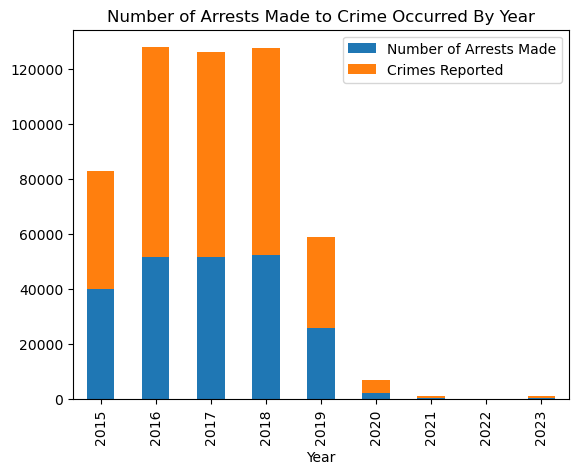

In [69]:
#Stacked bar chart for Arrest : Crime by Year
Totals.plot (x="Year", kind="bar", stacked=True, title="Number of Arrests Made to Crime Occurred By Year")
df_total = Totals["Number of Arrests Made"] + Totals["Crimes Reported"]
df_rel = Totals[Totals.columns[1:]].div(df_total, 0) * 100


<function matplotlib.pyplot.show(close=None, block=None)>

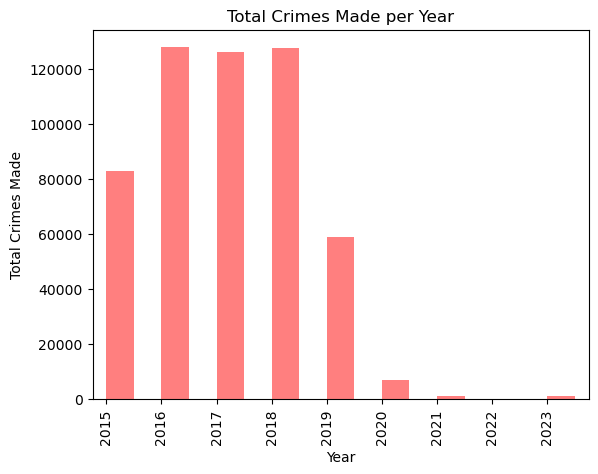

In [10]:
#plot the number of arrests per year
total_per_year.plot(kind='bar', color= 'r', alpha=0.5, align="edge")
plt.xticks(rotation="vertical")
plt.xlabel("Year")
plt.ylabel("Total Crimes Made")
plt.title("Total Crimes Made per Year")
plt.show

In [29]:
crime_years = crimes_data.sort_values(by=["Year","Primary Type"], ascending=True)
#crime_years = crime_years[crime_years[["Year","Primary Type"]]]
#crime_years = crime_years.set_
crime_years

,District,Primary Type,Arrest,Date,IUCR,Description,Location Description,FBI Code,Year,Latitude,Longitude
0,1.0,ARSON,True,10/26/2015 07:06:00 PM,1090,ATTEMPT ARSON,CONSTRUCTION SITE,09,2015,41.885874,-87.625284
483,7.0,ARSON,True,10/19/2015 09:33:00 PM,1020,BY FIRE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,09,2015,41.786930,-87.651557
5749,17.0,ARSON,True,11/24/2015 10:40:00 PM,1025,AGGRAVATED,OTHER,09,2015,41.960807,-87.740323
5750,17.0,ARSON,True,08/31/2015 11:00:00 AM,1025,AGGRAVATED,RESIDENCE,09,2015,41.952841,-87.710435
20063,18.0,ARSON,True,09/11/2015 01:04:00 PM,1090,ATTEMPT ARSON,SMALL RETAIL STORE,09,2015,41.899177,-87.643043
...,...,...,...,...,...,...,...,...,...,...,...
315987,11.0,WEAPONS VIOLATION,False,04/01/2023 03:14:00 AM,1477,RECKLESS FIREARM DISCHARGE,STREET,15,2023,41.873438,-87.726459
315988,11.0,WEAPONS VIOLATION,False,04/01/2023 10:22:00 PM,1477,RECKLESS FIREARM DISCHARGE,ALLEY,15,2023,41.895312,-87.729076
337868,25.0,WEAPONS VIOLATION,False,04/01/2023 04:41:00 AM,1477,RECKLESS FIREARM DISCHARGE,ALLEY,15,2023,41.935813,-87.767619
377771,12.0,WEAPONS VIOLATION,False,04/02/2023 01:44:00 AM,1477,RECKLESS FIREARM DISCHARGE,CHA PARKING LOT / GROUNDS,15,2023,41.898056,-87.698420


In [35]:
primary_per_2015 = crime_years[crime_years["Year"] == 2015]
primary_per_2015 = primary_per_2015["Primary Type"].value_counts()
primary_per_2015

THEFT                                19154
BATTERY                              14072
NARCOTICS                            12427
CRIMINAL DAMAGE                       6025
OTHER OFFENSE                         5487
ASSAULT                               4883
DECEPTIVE PRACTICE                    2922
CRIMINAL TRESPASS                     2869
BURGLARY                              2859
MOTOR VEHICLE THEFT                   2835
ROBBERY                               2777
WEAPONS VIOLATION                     1753
PUBLIC PEACE VIOLATION                1336
INTERFERENCE WITH PUBLIC OFFICER       749
PROSTITUTION                           703
OFFENSE INVOLVING CHILDREN             561
SEX OFFENSE                            360
CRIM SEXUAL ASSAULT                    319
GAMBLING                               210
LIQUOR LAW VIOLATION                   175
ARSON                                  119
STALKING                                43
INTIMIDATION                            32
KIDNAPPING 

In [36]:
primary_per_2015 = pd.DataFrame(primary_per_2015).reset_index()
primary_per_2015["Year"] = 2015
primary_per_2015.columns = ["Primary Type", "PrimeCount", "Year"]
primary_per_2015

,Primary Type,PrimeCount,Year
0,THEFT,19154,2015
1,BATTERY,14072,2015
2,NARCOTICS,12427,2015
3,CRIMINAL DAMAGE,6025,2015
4,OTHER OFFENSE,5487,2015
5,ASSAULT,4883,2015
6,DECEPTIVE PRACTICE,2922,2015
7,CRIMINAL TRESPASS,2869,2015
8,BURGLARY,2859,2015
9,MOTOR VEHICLE THEFT,2835,2015


In [ ]:
#Stacked bar chart for primary type of 2015
#District_df.plot (x="District", kind="bar", stacked=True, title="Number of Arrests Made to Crime Occurred By District")
#df_total = District_df["Number of Arrests Made"] + District_df["Crimes Reported"]
#df_rel = District_df[District_df.columns[1:]].div(df_total, 0) * 100

primary_per_2015.plot (x="Year", kind="bar", stacked=True, title="Primary Type of Crime By Year - 2015")
df_total = primary_per_2015
#plt.show

In [ ]:
# Stacked bar chart for Arrest:Crime by District
#District_df.plot (x="District", kind="bar", stacked=True, title="Number of Arrests Made to Crime Occurred By District")
#df_total = District_df["Number of Arrests Made"] + District_df["Crimes Reported"]
#df_rel = District_df[District_df.columns[1:]].div(df_total, 0) * 100

#plt.show

In [8]:
#count the number of arrests per year
total_arrests_per_year = crimes_data[crimes_data["Arrest"] == True].groupby('Year').size()
total_arrests_per_year

Year
2015    39908
2016    51806
2017    51592
2018    52314
2019    25715
2020     2194
2021      322
2022       33
2023      325
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

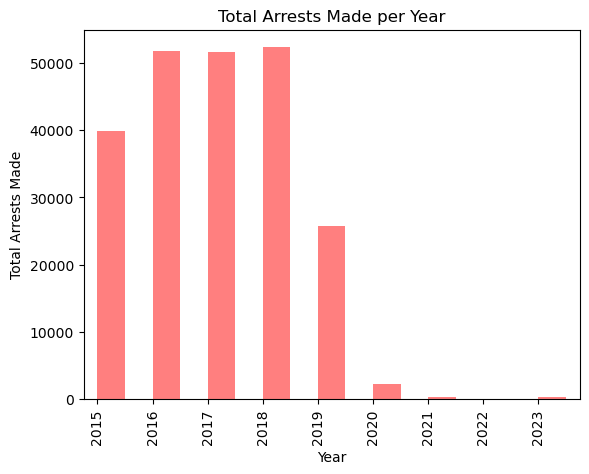

In [9]:
#plot the number of arrests per year
total_arrests_per_year.plot(kind='bar', color= 'r', alpha=0.5, align="edge")
plt.xticks(rotation="vertical")
plt.xlabel("Year")
plt.ylabel("Total Arrests Made")
plt.title("Total Arrests Made per Year")
plt.show